# Model

In [1]:
%run ../../data/api_keys.ipynb
%run ../modulos.ipynb
plt.style.use('default') 

In [2]:
def request_github(url,personal_access=personal_access_token):
    headers = {"Authorization": f"Bearer {personal_access}","Accept": "application/vnd.github.v3.star+json","content-type": "application/json"}

    res=requests.get(url ,headers=headers)
    return res.json()

## Información Histórica

In [3]:
def lista_fecha_a_df(lista,nombre='Grafica temporal', plot=False):
  df=pd.DataFrame({nombre:lista})
  df[f'freq_{nombre}']=pd.to_datetime(df[nombre]).dt.date
  df1=df.groupby(f'freq_{nombre}').size().cumsum()
  if plot: df1.plot()
  return df1

### Estrellas

In [4]:
res_repo=request_github('https://api.github.com/repos/freeCodeCamp/freeCodeCamp')
num_total_estrellas=res_repo['stargazers_count']

In [5]:
def request_github_no_json(url,personal_access=personal_access_token):
    headers = {"Authorization": f"Bearer {personal_access}","Accept": "application/vnd.github.v3.star+json","content-type": "application/json"}

    res=requests.get(url ,headers=headers)
    return res

In [14]:
def create_stargazers_count(user,repo):
    """this function creates the stargazers count dataframe"""

    star_count_url = "https://api.github.com/repos/"+user+"/"+repo
    # response = requests.request("GET", star_count_url)
    response = request_github_no_json(star_count_url)
    

    total_star_count = response.json()['stargazers_count']
    loops = int(total_star_count / 100) + 1
    star_trends_url = "https://api.github.com/repos/"+user+"/"+repo+"/stargazers"
    star_trends_resp = []
  
    for page in range(loops):
        # response = requests.request("GET", star_trends_url+"?per_page=100"+"&page="+str(page+1), headers=headers).json()
        response = request_github_no_json(star_trends_url+"?per_page=100"+"&page="+str(page+1)).json()
        star_trends_resp.extend(response)

    df = json_normalize(star_trends_resp)

    #df['starred_date'] = pd.to_datetime(df['starred_at']).dt.date

    #star_trend_df = df.groupby(['starred_date'])['starred_date'].count().cumsum().reset_index(name="count")

    return df

In [15]:
df_stars,res_json=create_stargazers_count('pysentimiento','pysentimiento')


In [16]:
df_stars

[{'starred_at': '2020-10-16T17:39:55Z',
  'user': {'login': 'chudichudichudi',
   'id': 529012,
   'node_id': 'MDQ6VXNlcjUyOTAxMg==',
   'avatar_url': 'https://avatars.githubusercontent.com/u/529012?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/chudichudichudi',
   'html_url': 'https://github.com/chudichudichudi',
   'followers_url': 'https://api.github.com/users/chudichudichudi/followers',
   'following_url': 'https://api.github.com/users/chudichudichudi/following{/other_user}',
   'gists_url': 'https://api.github.com/users/chudichudichudi/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/chudichudichudi/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/chudichudichudi/subscriptions',
   'organizations_url': 'https://api.github.com/users/chudichudichudi/orgs',
   'repos_url': 'https://api.github.com/users/chudichudichudi/repos',
   'events_url': 'https://api.github.com/users/chudichudichudi/events{/privacy}',
   'recei

In [13]:
res_json

{'id': 292896321,
 'node_id': 'MDEwOlJlcG9zaXRvcnkyOTI4OTYzMjE=',
 'name': 'pysentimiento',
 'full_name': 'pysentimiento/pysentimiento',
 'private': False,
 'owner': {'login': 'pysentimiento',
  'id': 85897277,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjg1ODk3Mjc3',
  'avatar_url': 'https://avatars.githubusercontent.com/u/85897277?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/pysentimiento',
  'html_url': 'https://github.com/pysentimiento',
  'followers_url': 'https://api.github.com/users/pysentimiento/followers',
  'following_url': 'https://api.github.com/users/pysentimiento/following{/other_user}',
  'gists_url': 'https://api.github.com/users/pysentimiento/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/pysentimiento/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/pysentimiento/subscriptions',
  'organizations_url': 'https://api.github.com/users/pysentimiento/orgs',
  'repos_url': 'https://api.github.com/users/pysentimiento/

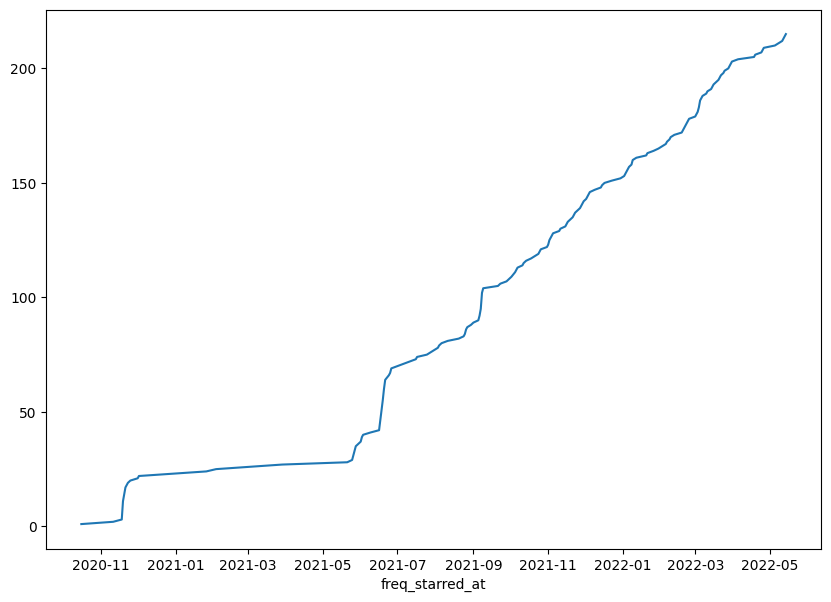

In [7]:
df_stars=create_stargazers_count('pysentimiento','pysentimiento')
plt.figure(figsize=(10,7))
starred_acum_df= lista_fecha_a_df(df_stars['starred_at'], 'starred_at', True)

In [8]:
df_stars

,starred_at,user.login,user.id,user.node_id,user.avatar_url,user.gravatar_id,user.url,user.html_url,user.followers_url,user.following_url,user.gists_url,user.starred_url,user.subscriptions_url,user.organizations_url,user.repos_url,user.events_url,user.received_events_url,user.type,user.site_admin
0,2020-10-16T17:39:55Z,chudichudichudi,529012,MDQ6VXNlcjUyOTAxMg==,https://avatars.githubusercontent.com/u/529012...,,https://api.github.com/users/chudichudichudi,https://github.com/chudichudichudi,https://api.github.com/users/chudichudichudi/f...,https://api.github.com/users/chudichudichudi/f...,https://api.github.com/users/chudichudichudi/g...,https://api.github.com/users/chudichudichudi/s...,https://api.github.com/users/chudichudichudi/s...,https://api.github.com/users/chudichudichudi/orgs,https://api.github.com/users/chudichudichudi/r...,https://api.github.com/users/chudichudichudi/e...,https://api.github.com/users/chudichudichudi/r...,User,False
1,2020-11-11T00:18:40Z,javiercanales,42976835,MDQ6VXNlcjQyOTc2ODM1,https://avatars.githubusercontent.com/u/429768...,,https://api.github.com/users/javiercanales,https://github.com/javiercanales,https://api.github.com/users/javiercanales/fol...,https://api.github.com/users/javiercanales/fol...,https://api.github.com/users/javiercanales/gis...,https://api.github.com/users/javiercanales/sta...,https://api.github.com/users/javiercanales/sub...,https://api.github.com/users/javiercanales/orgs,https://api.github.com/users/javiercanales/repos,https://api.github.com/users/javiercanales/eve...,https://api.github.com/users/javiercanales/rec...,User,False
2,2020-11-18T21:47:07Z,francolq,2314059,MDQ6VXNlcjIzMTQwNTk=,https://avatars.githubusercontent.com/u/231405...,,https://api.github.com/users/francolq,https://github.com/francolq,https://api.github.com/users/francolq/followers,https://api.github.com/users/francolq/followin...,https://api.github.com/users/francolq/gists{/g...,https://api.github.com/users/francolq/starred{...,https://api.github.com/users/francolq/subscrip...,https://api.github.com/users/francolq/orgs,https://api.github.com/users/francolq/repos,https://api.github.com/users/francolq/events{/...,https://api.github.com/users/francolq/received...,User,False
3,2020-11-19T01:58:52Z,IgnacioNicolasAlvarez,22875418,MDQ6VXNlcjIyODc1NDE4,https://avatars.githubusercontent.com/u/228754...,,https://api.github.com/users/IgnacioNicolasAlv...,https://github.com/IgnacioNicolasAlvarez,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,https://api.github.com/users/IgnacioNicolasAlv...,User,False
4,2020-11-19T03:12:34Z,diegonf84,39560693,MDQ6VXNlcjM5NTYwNjkz,https://avatars.githubusercontent.com/u/395606...,,https://api.github.com/users/diegonf84,https://github.com/diegonf84,https://api.github.com/users/diegonf84/followers,https://api.github.com/users/diegonf84/followi...,https://api.github.com/users/diegonf84/gists{/...,https://api.github.com/users/diegonf84/starred...,https://api.github.com/users/diegonf84/subscri...,https://api.github.com/users/diegonf84/orgs,https://api.github.com/users/diegonf84/repos,https://api.github.com/users/diegonf84/events{...,https://api.github.com/users/diegonf84/receive...,User,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2022-05-08T16:22:27Z,mgrova,29304573,MDQ6VXNlcjI5MzA0NTcz,https://avatars.githubusercontent.com/u/293045...,,https://api.github.com/users/mgrova,https://github.com/mgrova,https://api.github.com/users/mgrova/followers,https://api.github.com/users/mgrova/following{...,https://api.github.com/users/mgrova/gists{/gis...,https://api.github.com/users/mgrova/starred{/o...,https:/

In [9]:
intervalos = pd.qcut(starred_acum_df, q=4, retbins=True)[1]
intervalos

array([  1.  ,  80.25, 131.5 , 168.75, 215.  ])

[332.0, 1.2891566265060241, 1.2091121495327102, 1.1555555555555554]

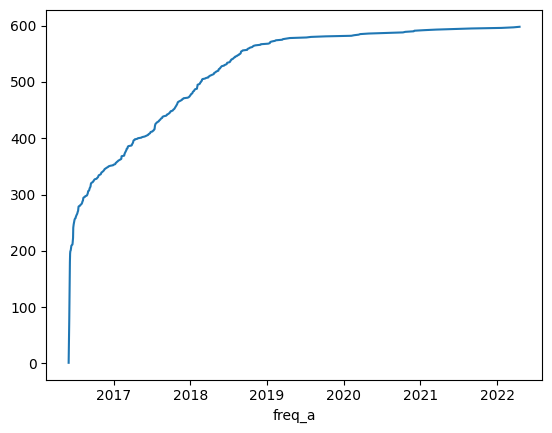

In [21]:
def crear_col_temporal_repo(fun,columna,user,repo,q=4,plot=False):
  '''
  fun:funcion como create_stargazers_count que regresa la cuenta de la serie de tiempo 
  '''
  try:
    cuentas_temporales=fun(user,repo) # Esto hace requests
    serie_acum=lista_fecha_a_df(cuentas_temporales[columna],'a',plot)
    cuantiles=pd.qcut(serie_acum, q=q, retbins=True)[1]
  except:
    return [np.nan]*4

  return [cuantiles[1]]+list(cuantiles[2:] / cuantiles[1:-1])

crear_col_temporal_repo(create_stargazers_count,'starred_at','little2s','NoChat',plot=True)

# Starred

In [15]:
def create_starred_count(user):
    """this function creates the stargazers count dataframe"""

    starred_url = "https://api.github.com/users/"+user+"/starred"
    repos_resp = []
   
    page=0
    response = request_github_no_json(starred_url+"?per_page=100"+"&page="+str(page+1)).json() # primeras 100
    repos_resp.extend(response)
    while len(response)!=0:
        page+=1
        response = request_github_no_json(starred_url+"?per_page=100"+"&page="+str(page+1)).json()
        repos_resp.extend(response)
        

    df = json_normalize(repos_resp)

    return df

In [19]:
def crear_col_temporal_user(fun,col,user,q=4,plot=False):
  '''
  fun:funcion como create_stargazers_count que regresa la cuenta de la serie de tiempo 
  '''
  # agarrar el error de cuando no existe alguna key
  try: 
    cuentas_temporales=fun(user) # Esto hace requests
    serie_acum=lista_fecha_a_df(cuentas_temporales[col],'a',plot)
    cuantiles=pd.qcut(serie_acum, q=4, retbins=True)[1]
  except:
    return [np.nan]*4

  return [cuantiles[1]]+list(cuantiles[2:] / cuantiles[1:-1])

crear_col_temporal_user(fun=create_starred_count,col='starred_at',user='pysentimiento',plot=True)

[nan, nan, nan, nan]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=152a8359-c113-4e0b-abe1-792bdde45c2e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>